In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
s=pd.read_csv('dataset.csv')

In [4]:
s=s.drop_duplicates(subset=['artists','track_name']).reset_index(drop=True)

In [5]:
s.dropna(inplace=True)

In [6]:
s.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
s['artists']=s['artists'].apply(lambda x:x.split(';'))

In [8]:
s['artists']=s['artists'].apply(lambda x:[i.replace(' ','')for i in x])

In [19]:
s['artists'].apply(lambda x:" ".join(x))

0                                               GenHoshino
1                                              BenWoodward
2                                    IngridMichaelson ZAYN
3                                              KinaGrannis
4                                          ChordOverstreet
5                                              TyroneWells
6                         AGreatBigWorld ChristinaAguilera
7                                                JasonMraz
8                                  JasonMraz ColbieCaillat
9                                            RossCopperman
10                                             ZackTabudlo
11                                               JasonMraz
12                                                 DanBerk
13                                            AnnaHamilton
14                                 ChordOverstreet Deepend
15                                              LandonPigg
16                                      AndrewFoy ReneeF

In [9]:
new_df=s[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence']]

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df)


In [11]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

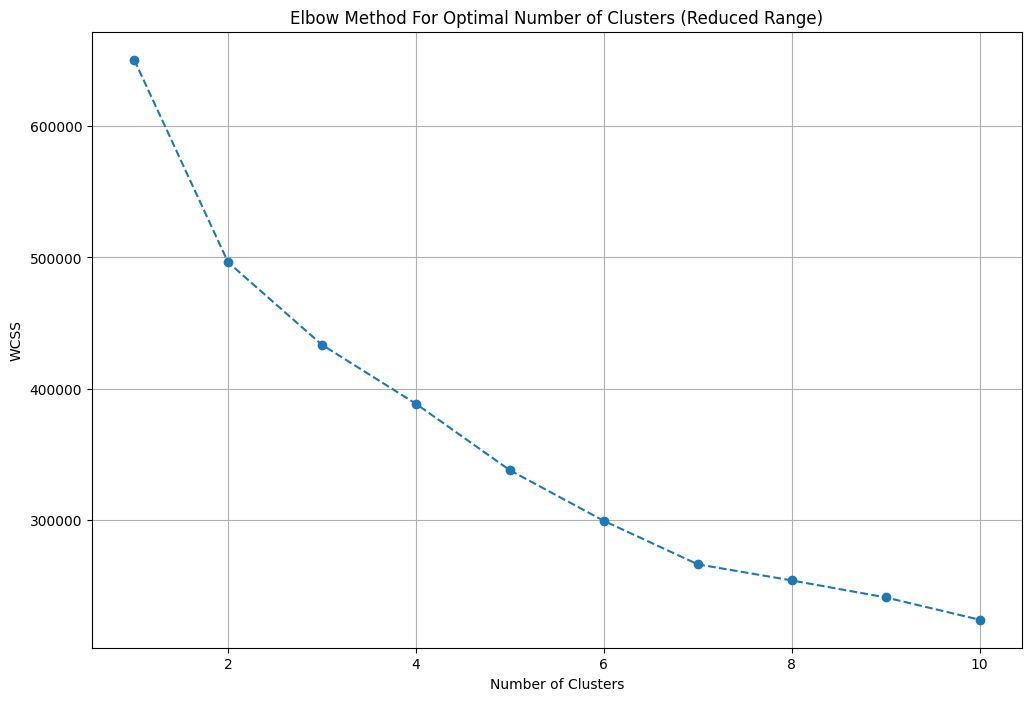

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [13]:
kmeans=KMeans(n_clusters=7,init='k-means++',random_state=42)
kmeans.fit(scaled_data)
predicted_data=kmeans.predict(scaled_data)

In [14]:
predicted_data

array([0, 1, 1, ..., 1, 1, 1])

In [15]:
a=pd.Series(predicted_data)

In [16]:
s['group']=a

In [17]:
s[s['group'].isnull()]

track_id         artists      album_name track_name  \
81343  2hETkH7cOfqmz3LqZDHZf5  [CesáriaEvora]  Miss Perfumado  Barbincor   

       popularity  duration_ms  explicit  danceability  energy  key  loudness  \
81343          22       241826     False         0.526   0.487    1   -10.204   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
81343     0       0.0725         0.681               0.0    0.0893    0.708   

        tempo  time_signature  track_genre  group  
81343  79.198               4  world-music    NaN

In [18]:
def recommend(song):
  target_group = s[s['track_name']==song].sort_values(by='popularity',ascending=False)['group'].head(1).iloc[0]
  return s[s['group']==target_group].head(5)['track_name']


In [19]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans




st.set_page_config(layout='wide')
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

2025-06-10 03:04:42.661 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [15]:
# Model 3
s=pd.read_csv('dataset.csv')
s=s.drop_duplicates(subset=['track_name','artists']).reset_index(drop=True)
s=s.drop(columns=['Unnamed: 0'])
s.dropna(inplace=True)
s['artists']=s['artists'].apply(lambda x:x.split(";"))
s['artists']=s['artists'].apply(lambda x:[i.replace(' ','') for i in x])
s['artists']=s['artists'].apply(lambda x:' '.join(x))
s['artists']=s['artists'].apply(lambda x: x.lower())

s['track_name']=s['track_name'].apply(lambda x: x.lower())
s['track_name']=s['track_name'].apply(lambda x: x.replace('-',''))

s['album_name']=s['album_name'].apply(lambda x: x.lower())
s['track_genre']=s['track_genre'].apply(lambda x: x.lower())

s['ft']=s['artists']+' '+s['album_name']+' '+s['track_name']+' '+s['track_genre']

ps=PorterStemmer()
def stem(text):
  y=[]
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y)

ps=PorterStemmer()
c=CountVectorizer(max_features=10000,stop_words='english')
de=c.fit_transform(s['ft']).toarray()
nn=NearestNeighbors(n_neighbors=20,metric='cosine')
nn.fit(de)
def basicrecommend(name,artist,album):
  p = s[(s['track_name'] == name) & (s['artists'] == artist)& (s['album_name'] == album)]
  p=p.sort_values(by='popularity',ascending=False).head(1)['ft']
  d=c.transform(p).toarray()
  distances, indices = nn.kneighbors(d)
  return s.iloc[[int(i) for i in indices[0]]]

In [16]:
# Model 2

s=pd.read_csv('dataset.csv')
s=s.drop_duplicates(subset=['track_name','artists']).reset_index(drop=True)
s=s.drop(columns=['Unnamed: 0'])
s.dropna(inplace=True)
s['artists']=s['artists'].apply(lambda x:x.split(';'))
s['artists']=s['artists'].apply(lambda x:" ".join(x))
de=s[['danceability', 'energy','loudness','speechiness','acousticness','instrumentalness', 'liveness', 'valence']]
ss=StandardScaler()
de=ss.fit_transform(de)
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=10,metric='cosine')
nn.fit(de)
s[['danceability', 'energy','loudness','speechiness','acousticness','instrumentalness', 'liveness', 'valence']]=pd.DataFrame(de)
def basicrecommend(name):
  p=s[s['track_name']==name]
  p=p.sort_values(by='popularity',ascending=False).head(1)
  p=p[['danceability', 'energy','loudness','speechiness','acousticness','instrumentalness', 'liveness', 'valence']]
  print(p)
  distances, indices = nn.kneighbors(p)
  return s.iloc[[int(i) for i in indices[0]]][['track_id','track_name','album_name','artists','track_genre']]

In [20]:
#Model 1
s=pd.read_csv('dataset.csv')
s=s.drop_duplicates(subset=['artists','track_name']).reset_index(drop=True)
s.dropna(inplace=True)
s.drop(columns=['Unnamed: 0'],inplace=True)
s['artists']=s['artists'].apply(lambda x:x.split(';'))
s['artists']=s['artists'].apply(lambda x:[i.replace(' ','')for i in x])
s['artists']=s['artists'].apply(lambda x:" ".join(x))
new_df=s[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df)
kmeans=KMeans(n_clusters=7,init='k-means++',random_state=42)
kmeans.fit(scaled_data)
predicted_data=kmeans.predict(scaled_data)
s['group']=pd.Series(predicted_data)
def recommend(song):
  target_group = s[s['track_name']==song].sort_values(by='popularity',ascending=False)['group'].head(1).iloc[0]
  return s[s['group']==target_group].head(5)[['track_name','album_name','artists']]